In [1]:
%matplotlib inline

# Homework 4

**DUE: 6/6/2021 11:59 (Sunday)**


## Part one: this notebook (60 points)

Part one of the homework is just like previous homeworks. Finish this notebook and turn in a report to canvas, in the format of a PDF as well as the .ipynb notebook itself. 


To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Runtime→→Restart runtime) and then run all cells (in the menubar, select Runtime→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE"


## Part Two: open-ended Image Classification problem (60 points)

Here is the link to the kaggle in class competition: https://www.kaggle.com/c/cse144-hw4-part2/. 

All descriptions about the problem, data, and submisison instructions can be found on the kaggle site. You will use the data provided to you, and then train a machine learning model of your own choice, and then use your model to predict on the test samples, and then submit your prediction to the kaggle website, which will calculate your accuracy score based on the truth label, and then show your result in the leaderboard. 


Hint: you can use what you learnt from part 1 to get better results in the kaggle competition. (a.k.a transfer learning). you are free to try any other techniques or ideas that you are curious of. 

You should write a report to describe what you did. The grading of this part of the homework will be partially from competition accuracy and ranking (40pt), and partially from report (20pt). 

## Question 1 - MNIST Hand-Written Digit. 

This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. More info can be found at the MNIST homepage. http://yann.lecun.com/exdb/mnist/

Run the following code cell to download the training and test data. It might take a while to download the zip file and extract it.

In [2]:
import tensorflow as tf
import numpy as np
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

### Part A) Understanding and Processing the Data (5pt)

Now that you downloaded the data, and save them in the four variables `x_train`, `y_train`, `x_test` and `y_test`. Complete the following steps:

1) Examine the data carefully, find out: 
* how many samples are in train, and how many are in test. 
* what's the input dimension of the training data
* what's the number of labels

2) rescale the pixel values of the training and test images from [0,255] to [0,1]

In [3]:
### YOUR CODE HERE ###
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
x_train = np.divide(x_train, 255)
x_test = np.divide(x_test, 255)
print("Max Value: ",np.max(x_train))

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
Max Value:  1.0


### Part B) Building a Convolutional Neural Network (30pt + 5pt)
For this assignment, we are not going to give you any starter code. You will be writing a convolutional neural network from scratch. You may use the keras documentation freely. You might also find online tutorials helpful. However, all code that you submit must be your own.

Make sure that your code is vectorized, and does not contain obvious inefficiencies (for example, unnecessary for loops). Ensure enough comments are included in the code so that your graders can understand what you are doing. It is your responsibility to show that you understand what you write.

Follow the steps below to show your work.

#### Step 1) Building the Network (10pt)
Build a convolutional neural network model that takes the ($28\times 28$) image as input, and predicts the digit. Explain your choice of the architecture: how many layers did you choose? What types of layers did you use? Were they fully-connected or convolutional? What about other decisions like pooling layers, activation functions, number of channels / hidden units?

In [4]:
### YOUR CODE HERE ###
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from tensorflow.keras.optimizers import * # you can use any optimizer




def make_model():
    model = Sequential()                                 # Linear stacking of layers

    # Convolution Layer 1
    model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps
    model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
    convLayer01 = Activation('relu')                     # activation
    model.add(convLayer01)
    model.add(Flatten())       
    model.add(BatchNormalization()) 
    model.add(Activation('relu'))  
    model.add(Dense(10))                                
    model.add(Activation('softmax'))           
    return model
    
def make_model2():
    model = Sequential()                               

    # Convolution Layer 1
    model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) 
    model.add(BatchNormalization(axis=-1))              
    model.add(Activation('relu'))                 
    model.add(Flatten())       
    model.add(BatchNormalization()) 
    model.add(Dense(units = 30, activation = 'linear'))  
    model.add(Dense(units = 10, activation = 'softmax'))           
    return model
    
model = make_model()
optim = Adam(learning_rate = .001)
#model.compile(loss='categorical_crossentropy', optimizer = 'adam',
 #             metrics=['accuracy'])
model.summary()
model = make_model2()
model.compile(loss='categorical_crossentropy', optimizer = 'adam',
              metrics=['accuracy'])
model.summary()
print("done")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 21632)             0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 21632)             86528     
_________________________________________________________________
activation_1 (Activation)    (None, 21632)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                2

[YOUR ANSWER HERE]

#### Step 2) Training the Network (10pt)
Write code that trains your neural network given the training data. Your training code should make it easy to tweak the usual hyperparameters, like batch size, learning rate, and the model object itself. Make sure that you are checkpointing your models from time to time (the frequency is up to you). Explain your choice of loss function and optimizer.

Plot the training curve as well. (`model.fit` returns a `History` object which contains the loss history in `History.history` attribute)

In [5]:
### YOUR CODE HERE ###
#Decision of 
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
# Your code
j = OneHotEncoder()
y_enc= y_train
y_enc = y_enc.reshape(-1, 1)
print(y_enc)
j.fit(y_enc)
y_enc_2 = j.transform(y_enc).toarray()
y_enc = y_enc_2
print(y_enc)
def plot_losses(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()
def plot_accuracies(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()
def plot_losses_no_val(hist):
    plt.plot(hist.history['loss'])
    #plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train'])
    plt.show()
def plot_accuracies_no_val(hist):
    plt.plot(hist.history['accuracy'])
    #plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train'])
    plt.show()
print(x_train.shape)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
print(x_train.shape)


[[5]
 [0]
 [4]
 ...
 [5]
 [6]
 [8]]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(60000, 28, 28)
(60000, 28, 28, 1)


Epoch 1/6
94/94 [==============================] - 97s 335ms/step - loss: 0.9285 - accuracy: 0.8453 - val_loss: 2.7962 - val_accuracy: 0.2280
Epoch 2/6
94/94 [==============================] - 31s 332ms/step - loss: 0.1709 - accuracy: 0.9657 - val_loss: 3.1277 - val_accuracy: 0.2822
Epoch 3/6
94/94 [==============================] - 30s 316ms/step - loss: 0.0821 - accuracy: 0.9806 - val_loss: 1.5634 - val_accuracy: 0.5978
Epoch 4/6
94/94 [==============================] - 28s 298ms/step - loss: 0.0561 - accuracy: 0.9872 - val_loss: 0.9965 - val_accuracy: 0.7084
Epoch 5/6
94/94 [==============================] - 30s 315ms/step - loss: 0.0408 - accuracy: 0.9896 - val_loss: 0.3923 - val_accuracy: 0.8938
Epoch 6/6
94/94 [==============================] - 31s 331ms/step - loss: 0.0251 - accuracy: 0.9921 - val_loss: 0.2193 - val_accuracy: 0.9524


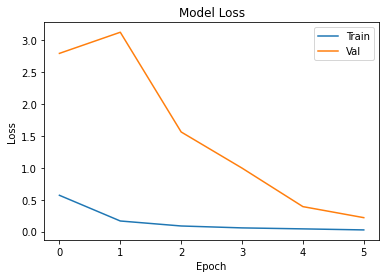

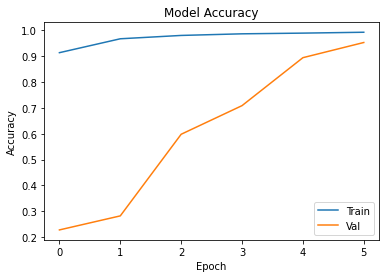

In [6]:

hist = model.fit(x_train, y_enc,
                    epochs = 6, 
                   batch_size = 512,
                    validation_split = 0.2,
                    verbose = 1)

plot_losses(hist)
plot_accuracies(hist)

[YOUR ANSWER HERE]

#### Step 3) Overfit to A Small Dataset (5pt)

One way to sanity check our neural network model and training code is to check whether the model is capable of overfitting or memorizing a small dataset. A properly constructed CNN with correct training code should be able to memorize the answers to a small number of images quickly.

Construct a small dataset (e.g. say ~10 sample from the training data). Then show that your model and training code is capable of memorizing the labels of this small data set.

With a large batch size (e.g. the entire small dataset) and a learning rate that is not too high, you should be able to obtain a 100% training accuracy on that small dataset relatively quickly.

(10, 28, 28, 1)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
(10, 10)
Epoch 1/6
1/1 [==============================] - 6s 6s/step - loss: 2.2965 - accuracy: 0.1000
Epoch 2/6
1/1 [==============================] - 0s 37ms/step - loss: 0.0170 - accuracy: 1.0000
Epoch 3/6
1/1 [==============================] - 0s 20ms/step - loss: 5.6396e-04 - accuracy: 1.0000
Epoch 4/6
1/1 [==============================] - 0s 16ms/step - loss: 4.8873e-05 - accuracy: 1.0000
Epoch 5/6
1/1 [==============================] - 0s 28ms/step - loss: 7.0094e-06 - accuracy: 1.0000
Epoch 6/6
1/1 [==============================] - 0s 29ms/step - loss: 1.3947e-06 - accuracy: 1.0000


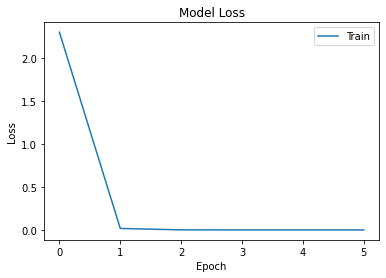

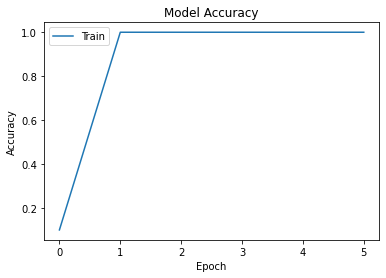

In [7]:
### YOUR CODE HERE ###
#CANNOT USE VALIDATION FOR SMALL DATASET OF SIZE 10, BECAUSE SOME OF THE NUMBERS HAVENT BEEN TRAINED
#EG FIRST 10 NUMBERS ARE 5, 0, 4, 1, 9, 2, 1, 3, 1, and 4. This means that if 5, 0, 9, 2 or 3 are in the
#validation set they have not been trained and so will most likley be wrong.
model = make_model()
optim = Adam(learning_rate = 10)
model.compile(loss='categorical_crossentropy', optimizer = 'adam',
              metrics=['accuracy'])
x_ten_train = x_train[0:10]
print(x_ten_train.shape)
y_ten_enc = y_enc[0:10]
print(y_ten_enc)
print(y_ten_enc.shape)
hist = model.fit(x_ten_train, y_ten_enc,
                    epochs = 6, 
                   batch_size = 10,
                    validation_split = 0,
                    verbose = 1)

plot_losses_no_val(hist)
plot_accuracies_no_val(hist)

#### Step 4) Try different activation function (5pt)

Try at least 3 different activtation functions other than relu. Report the result. 



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_7 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 21632)             0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 21632)             86528     
_________________________________________________________________
dense_4 (Dense)              (None, 30)                648990    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

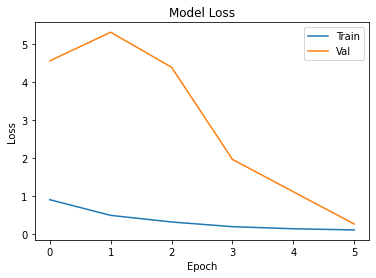

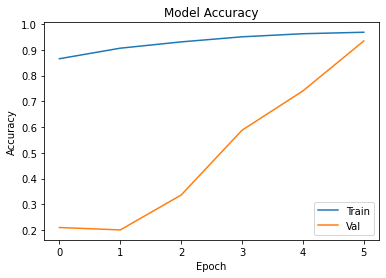

In [8]:
### YOUR CODE HERE ###
def make_model_2():
    model = Sequential()                                 # Linear stacking of layers

    # Convolution Layer 1
    model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps
    model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
    model.add(Activation('sigmoid'))                  # activation
    model.add(Flatten())       
    model.add(BatchNormalization()) 
    model.add(Dense(units = 30, activation = 'linear'))  
    model.add(Dense(units = 10, activation = 'softmax'))           
    return model
    
model = make_model_2()
optim = Adam(learning_rate = .001)
model.compile(loss='categorical_crossentropy', optimizer = 'adam',
              metrics=['accuracy'])
model.summary()
hist = model.fit(x_train, y_enc,
                    epochs = 6, 
                   batch_size = 512,
                    validation_split = 0.2,
                    verbose = 1)

plot_losses(hist)
plot_accuracies(hist)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_8 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 21632)             0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 21632)             86528     
_________________________________________________________________
dense_6 (Dense)              (None, 30)                648990    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

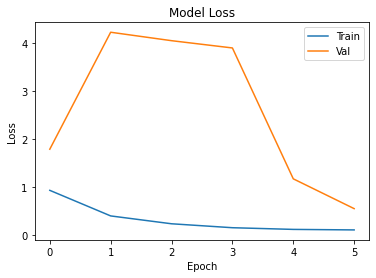

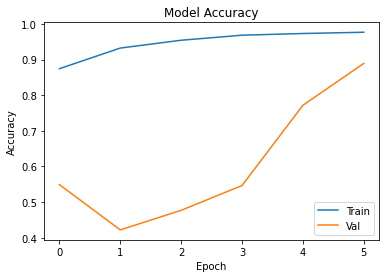

In [9]:
def make_model_3():
    model = Sequential()                                 # Linear stacking of layers

    # Convolution Layer 1
    model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps
    model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
    model.add(Activation('tanh'))                  # activation
    model.add(Flatten())       
    model.add(BatchNormalization()) 
    model.add(Dense(units = 30, activation = 'linear'))  
    model.add(Dense(units = 10, activation = 'softmax'))           
    return model
    
model = make_model_3()
optim = Adam(learning_rate = .001)
model.compile(loss='categorical_crossentropy', optimizer = 'adam',
              metrics=['accuracy'])
model.summary()
hist = model.fit(x_train, y_enc,
                    epochs = 6, 
                   batch_size = 512,
                    validation_split = 0.2,
                    verbose = 1)

plot_losses(hist)
plot_accuracies(hist)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_10 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
activation_9 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 21632)             0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 21632)             86528     
_________________________________________________________________
dense_8 (Dense)              (None, 30)                648990    
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

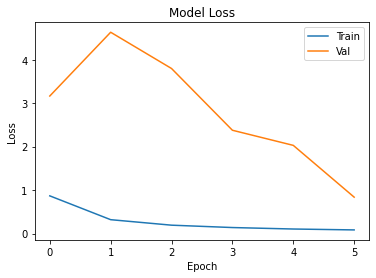

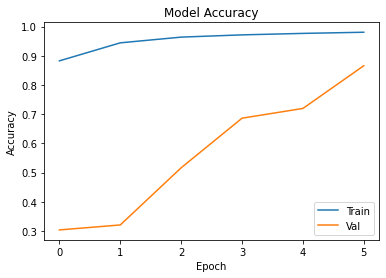

In [10]:
def make_model_4():
    model = Sequential()                                 # Linear stacking of layers

    # Convolution Layer 1
    model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps
    model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
    model.add(Activation('elu'))                  # activation
    model.add(Flatten())       
    model.add(BatchNormalization()) 
    model.add(Dense(units = 30, activation = 'linear'))  
    model.add(Dense(units = 10, activation = 'softmax'))           
    return model
    
model = make_model_4()
optim = Adam(learning_rate = .001)
model.compile(loss='categorical_crossentropy', optimizer = 'adam',
              metrics=['accuracy'])
model.summary()
hist = model.fit(x_train, y_enc,
                    epochs = 6, 
                   batch_size = 512,
                    validation_split = 0.2,
                    verbose = 1)

plot_losses(hist)
plot_accuracies(hist)

[YOUR ANSWER HERE]

#### Step5) (Bonus) Data Augmentation (5pt)
Try improving the result of your model by generating more training data by augmentation. Using the `ImageDataGenerator` in keras: https://keras.io/api/preprocessing/image/

In [11]:
### YOUR CODE HERE ###

[YOUR ANSWER HERE]

## Question 2 - Transfer Learning (20pt)
---
For many image classification tasks, it is generally not a good idea to train a very large deep neural network model from scratch due to the enormous compute requirements and lack of sufficient amounts of training data.

One of the better options is to try using an existing model that performs a similar task to the one you need to solve. This method of utilizing a pre-trained network for other similar tasks is broadly termed Transfer Learning. In this assignment, we will use Transfer Learning to extract features from the MNIST images. Then, train a smaller network to use these features as input and classify the digits.

As you have learned from the lecture, convolution layers extract various features from the images which get utilized by the fully connected layers for correct classification.

Keras has pretrained models built in for this purpose. 

#### Keras Pretrained Models
        Xception
        VGG16
        VGG19
        ResNet, ResNetV2, ResNeXt
        InceptionV3
        InceptionResNetV2
        MobileNet
        MobileNetV2
        DenseNet
        NASNet

Usually one uses the layers of the pretrained model up to some point, and then creates some fully connected layers to learn the desired recognition task. The earlier layers are "frozen", and only the later layers need to be trained. We'll use ResNet50, which was trained to recognize 1000 objects in ImageNet. What we're doing here for our classifier may be akin to killing a fly with a shotgun, but the same process can be used to recognize objects the original network couldn't (i.e., you could use this technique to train your computer to recognize family and friends).

In [12]:
# Some stuff we'll need...
from tensorflow.keras.layers import Input
from tensorflow.keras.applications.resnet import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from keras.applications.resnet import ResNet50
from keras.layers import GlobalMaxPooling2D,GlobalAveragePooling2D


Creating this pretrained network is a one line command. Notice we specified that the "top" should not be included. We aren't classifying 1000 different categories like ImageNet, so we don't include that layer. We'll add our own layer more suited to the task at hand.

We choose (32, 32, 3) as our input dimension, despite the fact that mnist data is (28, 28, 1), because the pretrained ResNet50 has restaint on the input dimension to be at least (32, 32) and 3 color channels. We will have to add padding around the mnist data to make it (32,32, 3). This will be done later. 

In [13]:
# Import the ResNet50 trained neural network model, minus it's last (top) neuron layer.
base_model = ResNet50(weights = 'imagenet', 
                   include_top = False, 
                   input_shape = (32, 32, 3), 
                   pooling = None)
x = base_model.output
print(type(x))

<class 'keras.engine.keras_tensor.KerasTensor'>


Let's take a look at this pretrained model:

In [14]:
base_model.summary()
x = base_model.output
print(type(x))

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

Please do realize, this may be overkill for our toy recognition task. One could use this network with some layers (as we're about to add) to recognize 100 dog breeds or to recognize all your friends. If you wanted to recognize 100 dog breeds, you would use a final 100 neuron softmax for the final layer. We'll need a final softmax layer as before. First let's freeze all these pretrained weights. They are fine as they are.

In [15]:
# This freezes the weights of the pretrained model.
for layer in base_model.layers:  
    layer.trainable = False

In [16]:
print(y_enc.shape)
print(x_train.shape)


(60000, 10)
(60000, 28, 28, 1)


### Part A) Building and Compiling the Model (10pt)
Now let's just add a flatten layer, a trainable dense layer, and a final softmax layer to the network to complete the classifier model for our gesture recognition task. Use Keras' functional approach to building a network.

Hint: read about `keras.layers.GlobalAveragePooling2D()` for flattening layer. 

Then compile the model using an appropriate loss function and optimizer.

In [17]:
### YOUR CODE HERE ###

x = base_model.output
print(type(x))
x = GlobalAveragePooling2D()(x)
print(type(x))
x = Dense(1000)(x)
out = Dense(10,activation='softmax')(x)
model_final = Model(base_model.input,out)
print("DONE")
model_final.summary()

<class 'keras.engine.keras_tensor.KerasTensor'>
<class 'keras.engine.keras_tensor.KerasTensor'>
DONE
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Total params: 25,646,722
Trainable params: 2,059,010
Non-trainable params: 23,587,712
__________________________________________________________________________________________________


### Part B) Training the Model (5pt)

Train your new network, including any hyperparameter tuning. Plot the training curve of your best model only.

As you can see here in the Keras docs:

https://keras.io/api/applications/resnet/#resnet50-function

The pretrained ResNet50 has restaint on the input dimension to be at least (32, 32, 3). We will have to add padding around the mnist data to make it go from (28, 28, 1) to (32,32, 3)

Hint: read on `numpy.pad`, `numpy.stack`, and numpy array `reshape` function for adding padding. 

In [18]:
# Preprocess your input image data, add padding, and 3 color channels
### YOUR CODE HERE ###
print(x_train.shape)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2],1))
print(x_train.shape)
npad = ((0, 0), (2, 2), (2, 2), (1,1))
x_train = np.pad(x_train, pad_width=npad, mode='constant', constant_values=0)
print(x_train.shape)
print(x_test.shape)
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2],1))
x_test = np.pad(x_test, pad_width=npad, mode='constant', constant_values=0)
print(x_test.shape)


(60000, 28, 28, 1)
(60000, 28, 28, 1)
(60000, 32, 32, 3)
(10000, 28, 28)
(10000, 32, 32, 3)


In [19]:
# Train the model
print(y_enc[0])
### YOUR CODE HERE ###
model_final.compile(loss='categorical_crossentropy', optimizer = 'adam',
              metrics=['accuracy'])
hist = model_final.fit(x_train, y_enc,
                    epochs = 6, 
                   batch_size = 512,
                    validation_split = 0.2,
                    verbose = 1)


print("done")

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Epoch 1/6
94/94 [==============================] - 112s 1s/step - loss: 2.2860 - accuracy: 0.4938 - val_loss: 0.9428 - val_accuracy: 0.7612
Epoch 2/6
94/94 [==============================] - 94s 998ms/step - loss: 0.8213 - accuracy: 0.7732 - val_loss: 0.6651 - val_accuracy: 0.8159
Epoch 3/6
94/94 [==============================] - 90s 964ms/step - loss: 0.6221 - accuracy: 0.8210 - val_loss: 0.5013 - val_accuracy: 0.8657
Epoch 4/6
94/94 [==============================] - 96s 1s/step - loss: 0.5303 - accuracy: 0.8423 - val_loss: 0.4522 - val_accuracy: 0.8680
Epoch 5/6
94/94 [==============================] - 97s 1s/step - loss: 0.4703 - accuracy: 0.8569 - val_loss: 0.4040 - val_accuracy: 0.8785
Epoch 6/6
94/94 [==============================] - 94s 1s/step - loss: 0.4447 - accuracy: 0.8601 - val_loss: 0.4048 - val_accuracy: 0.8757
done


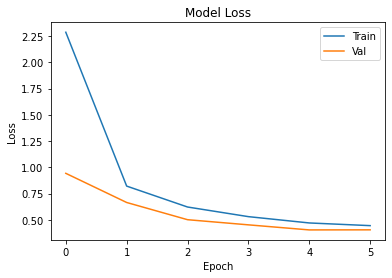

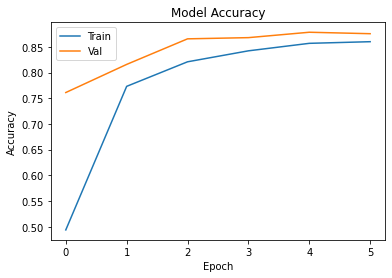

In [20]:
# Plot the training curve
### YOUR CODE HERE 
plot_losses(hist)
plot_accuracies(hist)

### Part C) Try things on your own (5pt)

You can do the following: 

Use a diffferent pre-trained model from keras other than ResNet50. It took about 3 minutes per epoch for me to do transfer learning on ResNet50, maybe you want to use a smaller model for faster results and training time, maybe you want to use a larger model because you have good hardware, e.g. GPU. 

Or you can change the last layers after the pretrained model. You can increase (or decrease) the number of nodes per layer, increase (or decrease) the number of layers, and add dropout if your model is overfitting, change the hyperparameters, change your optimizer, etc. 

Try to get the validation accuracy higher than what the previous transfer learning model was able to obtain, and try to minimize the amount of overfitting.

Plot the classification accuracy for each epoch. Report the best test accuracy your model was able to achieve.

In [21]:
# Import the ResNet50 trained neural network model, minus it's last (top) neuron layer.
base_model = ResNet50(weights = 'imagenet', 
                   include_top = False, 
                   input_shape = (32, 32, 3), 
                   pooling = None)
# This freezes the weights of the pretrained model.
for layer in base_model.layers:  
    layer.trainable = False

[YOUR ANSWER HERE]

In [22]:
### YOUR CODE HERE ###
from keras.layers import Conv1D

x = base_model.output
print(type(x))
x = GlobalAveragePooling2D()(x)
#print(type(x))
#x = Dense(10, 'relu')(x)
#out = Dense(10,activation='softmax')(x)
#model_final = Model(base_model.input,out)
#model_final.summary()

                           
           
x = Dense(units = 1024,  activation = 'relu')(x)                 
x = BatchNormalization()(x) 
print(x.get_shape())
#model.add(Conv1D(32, 1, input_shape=128)) # 32 different 3x3 kernels -- so 32 feature maps

#input_shape_conv = (4, 10, 128)
x = Dense(units = 1024, activation = 'relu')(x)
x = BatchNormalization()(x) 

#x = tf.keras.layers.Conv1D(3, 3, activation='relu', input_shape = input_shape_conv)(x)
x = Dense(units = 1024, activation = 'linear')(x)
out = Dense(10,activation='softmax')(x)
model_final = Model(base_model.input,out)
model_final.summary()
print("DONE")
#Total params: 23,616,394
#Trainable params: 23,559,178
#Non-trainable params: 57,216

<class 'keras.engine.keras_tensor.KerasTensor'>
(None, 1024)
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Total params: 27,803,530
Trainable params: 4,211,722
Non-trainable params: 23,591,808
__________________________________________________________________________________________________
DONE


In [24]:
### YOUR CODE HERE ###
model_final.compile(loss='categorical_crossentropy', optimizer = 'adam',
              metrics=['accuracy'])
hist = model_final.fit(x_train, y_enc,
                    epochs = 6, 
                   batch_size = 512,
                    validation_split = 0.2,
                    verbose = 1)


print("done")

Epoch 1/6
94/94 [==============================] - 146s 1s/step - loss: 0.4077 - accuracy: 0.8657 - val_loss: 0.3218 - val_accuracy: 0.8982
Epoch 2/6
94/94 [==============================] - 130s 1s/step - loss: 0.3542 - accuracy: 0.8821 - val_loss: 0.3229 - val_accuracy: 0.8898
Epoch 3/6
94/94 [==============================] - 137s 1s/step - loss: 0.3291 - accuracy: 0.8905 - val_loss: 0.2862 - val_accuracy: 0.9082
Epoch 4/6
94/94 [==============================] - 127s 1s/step - loss: 0.3127 - accuracy: 0.8959 - val_loss: 0.3003 - val_accuracy: 0.9002
Epoch 5/6
94/94 [==============================] - 126s 1s/step - loss: 0.3078 - accuracy: 0.8980 - val_loss: 0.2796 - val_accuracy: 0.9094
Epoch 6/6
94/94 [==============================] - 133s 1s/step - loss: 0.2881 - accuracy: 0.9038 - val_loss: 0.2666 - val_accuracy: 0.9127
done


In [25]:
plot_losses(hist)
plot_accuracies(hist)

[[2.5578483e-05 4.4612668e-04 2.1450002e-02 2.7846554e-01 4.0081696e-04
  6.8923610e-01 5.4475974e-04 4.1876123e-03 4.3493416e-03 8.9403568e-04]
 [9.9728644e-01 3.7596724e-08 4.1602054e-04 7.8961690e-05 9.6052156e-07
  1.7896114e-04 9.5175979e-05 4.0654077e-06 1.1395544e-03 7.9987460e-04]
 [8.1341909e-08 2.3982173e-03 2.5882304e-05 6.1184551e-07 9.7980899e-01
  1.6253595e-07 1.0483243e-06 1.7726498e-02 1.5434908e-07 3.8235041e-05]
 [2.1016505e-05 9.9903935e-01 1.0109360e-06 1.3250135e-06 4.0201546e-04
  1.4916087e-05 9.4695897e-05 3.2366556e-04 9.8346190e-06 9.2113783e-05]
 [2.4501968e-04 3.0091824e-05 3.8924409e-05 6.6339759e-05 6.9845289e-02
  7.9661324e-05 8.4431638e-05 1.4169917e-03 3.3653917e-04 9.2785662e-01]
 [5.8866879e-03 2.6951605e-04 8.5468721e-01 8.1981607e-02 5.4566568e-04
  3.4660336e-03 1.7447592e-04 1.0997360e-03 3.2291953e-02 1.9597223e-02]
 [4.7357574e-07 9.9965477e-01 6.4289515e-07 2.4975487e-04 8.2271899e-06
  2.9153267e-05 3.6202102e-06 1.6810731e-05 3.3611024e-05 